In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lifelines.utils.sklearn_adapter import sklearn_adapter
from lifelines import CoxPHFitter

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import datasets, linear_model
from scipy.integrate import simps
from sklearn import metrics
from math import sqrt

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\LUAD FIREHOSE LEGACY DATABASE')#setting the right directory

In [3]:
# Importing the dataset
dt1 = pd.read_excel('FLUX.xlsx')
dt2 = pd.read_excel('GENES.xlsx')

In [4]:
font = {'family': 'arial',
         'size': 14,
        }

In [5]:
dt1.head(2)

,HUG0_SYMBOL,3DSPHR,3HBCOAHLm,ABTArm,ABTD,ACACT1r,ACACT1rm,ACACT1x,ACOAD9m,ACOAO7p,...,1513TACRitr,1531TACRitr,DEOXFVSitx,FVSitx,TACRitr,13DMTitr,15DMTitr,31DMTitr,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,...,14.770344,14.770344,-431.370763,431.370763,26.309675,-6.000452,-6.000452,-6.000452,1,0.00
1,TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,...,34.017476,34.017476,-219.803538,219.803538,60.593629,-13.819600,-13.819600,-13.819600,1,50.03


In [6]:
dt2.head(2)

,Hugo_Symbol,UBE2Q2P2,SSX9,CXORF67,EFCAB8,SDR16C6P,EFCAB12,A1BG,A1CF,RBFOX1,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,-0.4238,-0.1379,-0.1805,0.4529,-0.3317,-0.1012,-0.6977,-0.1476,-0.224,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,-0.3291,-0.1379,-0.1805,-0.0869,-0.3317,-0.1661,-0.1483,-0.1371,-0.226,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [7]:
del dt1['Overall Survival (Months)']
del dt1['Patient\'s Vital Status']
del dt2['Hugo_Symbol']

In [8]:
dt = dt1.merge(dt2,left_index=True,right_index=True)

In [9]:
dt.head(2)

,HUG0_SYMBOL,3DSPHR,3HBCOAHLm,ABTArm,ABTD,ACACT1r,ACACT1rm,ACACT1x,ACOAD9m,ACOAO7p,...,SLU7,SLURP1,SMAD2,SMAD3,SMAD4,SMAD5,SMAD6,SMAD7,Patient's Vital Status,Overall Survival (Months)
0,TCGA-05-4244-01,11.448262,154.187481,-583.764387,-14.237357,125.403072,235.338244,457.654536,74.716367,72.493260,...,3.4584,-0.2752,-0.7736,-0.6896,-0.0017,0.1779,-0.6433,0.7445,1,0.00
1,TCGA-05-4249-01,9.173955,162.200877,-442.863722,-5.338254,128.134267,137.492687,149.939274,75.026103,56.620656,...,0.7962,-0.2752,-0.6214,0.0881,1.3829,2.3203,-0.4918,0.0368,1,50.03


In [10]:
dc = "Overall Survival (Months)"; 
ec = "Patient\'s Vital Status"

dt_ = dt.drop('HUG0_SYMBOL', axis=1)

y = dt_.pop(dc).values
z1 = dt_.pop(ec).values
X = dt_

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z1_train, z1_test = train_test_split(X, y, z1, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, z1_train, z1_val = train_test_split(X_train, y_train, z1_train, test_size=0.2, random_state=0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [13]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [14]:
# Applying Selecting Features
from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [15]:
explained_variance

array([0.06630907, 0.05272993, 0.04489655, 0.03971667, 0.03379048,
       0.02693764, 0.0229222 , 0.01997504, 0.01723999, 0.01436369,
       0.01282248, 0.01246524, 0.01143812, 0.01069049, 0.01021498])

In [16]:
conc1 = np.vstack(X_train)
conc2 = np.vstack(X_test)
conc3 = np.vstack(X_val)

X_train = pd.DataFrame(conc1, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
                                      'PC14', 'PC15'])
X_test = pd.DataFrame(conc2, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
                                     'PC14', 'PC15'])
X_val = pd.DataFrame(conc3, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
                                    'PC14', 'PC15'])

conc4 = np.vstack(z1_train)
conc5 = np.vstack(z1_test)
conc6 = np.vstack(z1_val)

z1_train = pd.DataFrame(conc4, columns=['Patient\'s Vital Status'])
z1_test = pd.DataFrame(conc5, columns=['Patient\'s Vital Status'])
z1_val = pd.DataFrame(conc6, columns=['Patient\'s Vital Status'])

In [17]:
X_train = X_train.merge(z1_train,left_index=True,right_index=True)
X_val = X_val.merge(z1_val,left_index=True,right_index=True)
X_test = X_test.merge(z1_test,left_index=True,right_index=True)

In [18]:
base_class = sklearn_adapter(CoxPHFitter, event_col='Patient\'s Vital Status')
cph = base_class(penalizer=200.0, strata=None, tie_method='Efron')

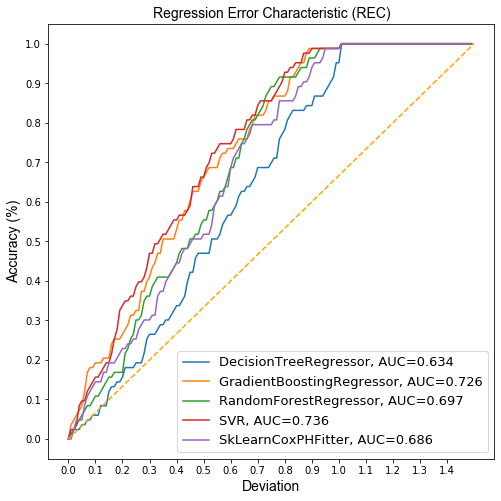

In [19]:
# Instantiate the classfiers and make a list
regressors = [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'),
              GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), 
              RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 
              SVR(gamma='scale', C=0.8),
              cph]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'Deviation','Accuracy','AUC'])

# Train the models and record the results
for rls in regressors:
    model = rls.fit(X_train, y_train)
    y_pred = model.predict(X_val)    
    
    
    def REC(y_val , y_pred):
    
        # initilizing the lists
        Accuracy = []
    
        # initializing the values for Epsilon
        Begin_Range = 0
        End_Range = 1.5
        Interval_Size = 0.01
    
        # List of epsilons
        Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
        
        # Main Loops
        for i in range(len(Epsilon)):
            count = 0.0
            for j in range(len(y_val)):
                if np.linalg.norm(y_val[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                    count = count + 1
        
            Accuracy.append(count/len(y_val))
    
        # Calculating Area Under Curve using Simpson's rule
        AUC = simps(Accuracy , Epsilon ) / End_Range
        
        # returning epsilon , accuracy , area under curve    
        return Epsilon , Accuracy , AUC

    # finding the deviation and accuracy, and area under curve for plotting
    Deviation, Accuracy, AUC = REC(y_val, y_pred)

    # Calculating R^2 of the true and predicted values
    #RR = r2_score(y_val, y_predval)

    
    result_table = result_table.append({'regressors':rls.__class__.__name__,
                                        'Deviation':Deviation, 
                                        'Accuracy':Accuracy, 
                                        'AUC':AUC}, ignore_index=True)
    
# Set name of the classifiers as index labels
result_table.set_index('regressors', inplace=True)

fig = plt.figure(figsize=(8,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['Deviation'],
            result_table.loc[i]['Accuracy'],
            label="{}, AUC={:.3f}".format(i, result_table.loc[i]['AUC']))
    
        


plt.plot([0,1.5], [0,1], color='orange', linestyle='--')
plt.title("Regression Error Characteristic (REC)", fontdict=font)
#plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xticks(np.arange(0.0, 1.5, step=0.1))
plt.xlabel("Deviation", fontdict=font)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Accuracy (%)", fontdict=font)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\PCA\FLUXGENES\AUC_FLUX.pdf', bbox_inches="tight")
plt.show()

In [20]:
# Instantiate the classfiers and make a list
regressors = [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'),
              GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), 
              RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 
              SVR(gamma='scale', C=0.8),
              cph]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'MAE','MSE','RMSE', 'rRMSE'])

# Train the models and record the results
for rls in regressors:
    model = rls.fit(X_train, y_train)
    y_pred = model.predict(X_val)    
    
    # Print result of MAE
          
    MAE = metrics.mean_absolute_error(y_val, y_pred)
    #print(metrics.mean_absolute_error(y_test, y_pred))

    # Print result of MSE
    MSE = metrics.mean_squared_error(y_val, y_pred)
    #print(metrics.mean_squared_error(y_test, y_pred))

    # Print result of RMSE
    RMSE = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
    #print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
    def rmse_metric(y_val, y_pred):
        sum_error = 0.0
        for i in range(len(y_val)):
            prediction_error = y_pred[i] - y_val[i]
            sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(y_val))
        return sqrt(mean_error)

    rmse = rmse_metric(y_val, y_pred)

    def meanactual_metric(y_val):
        sum_error = 0.0
        for i in range(len(y_val)):
            prediction_error = y_val[i]
            sum_error += prediction_error
            mean_error = sum_error / float(len(y_val))
        return (mean_error)

    mean = meanactual_metric(y_val)
    rRMSE = rmse/mean

    
    result_table = result_table.append({'regressors':rls.__class__.__name__,
                                        'MAE':MAE, 
                                        'MSE':MSE, 
                                        'RMSE':RMSE,
                                        'rRMSE':rRMSE}, ignore_index=True)
print(result_table)

                  regressors        MAE         MSE       RMSE     rRMSE
0      DecisionTreeRegressor  22.693876  920.560777  30.340744  1.057315
1  GradientBoostingRegressor  17.120224  616.522908  24.829879  0.865272
2      RandomForestRegressor  19.396591  741.885317  27.237572  0.949176
3                        SVR  16.230039  595.834845  24.409728  0.850631
4         SkLearnCoxPHFitter  23.745822  793.121965  28.162421  0.981405


In [21]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [22]:
kmf.fit(y_pred, z1_val)

c:\python\python37\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:262: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 83 total observations, 28 right-censored observations>

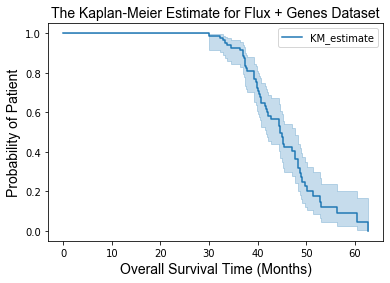

In [23]:
kmf.plot_survival_function()
plt.title("The Kaplan-Meier Estimate for Flux + Genes Dataset", fontdict=font)
plt.xlabel("Overall Survival Time (Months)", fontdict=font)
plt.ylabel("Probability of Patient", fontdict=font)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\PCA\FLUXGENES\KM_FLUXGENES.pdf', bbox_inches="tight")

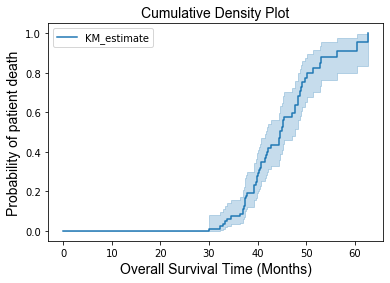

In [24]:
# Plot the cumulative density graph:

kmf.plot_cumulative_density()
plt.title("Cumulative Density Plot", fontdict=font)
plt.xlabel("Overall Survival Time (Months)", fontdict=font)
plt.ylabel("Probability of patient death", fontdict=font)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\PCA\FLUXGENES\CUMULATIVEKM_FLUXGENES.pdf', bbox_inches="tight")